In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

In [2]:
df1 = pd.read_csv('/home/jieun201/fullprecision400e_yprofile/InputTrainSet.csv')
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,4093.0,8336.0,3660.0,4474.0,2345.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.10823
1,0.0,0.0,0.0,5023.0,4542.0,6073.0,5413.0,3269.0,0.0,0.0,0.0,0.0,0.0,-3.45376
2,0.0,0.0,852.0,1766.0,2344.0,1142.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.61907
3,0.0,0.0,0.0,0.0,1199.0,3588.0,2720.0,1997.0,0.0,0.0,0.0,0.0,0.0,-1.95746
4,0.0,0.0,7035.0,13347.0,14181.0,6917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.71867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429745,0.0,0.0,0.0,0.0,0.0,2595.0,3174.0,4177.0,0.0,0.0,0.0,0.0,0.0,1.06011
429746,0.0,0.0,0.0,0.0,5265.0,6734.0,9455.0,5556.0,0.0,0.0,0.0,0.0,0.0,-1.96949
429747,0.0,0.0,0.0,573.0,1596.0,1378.0,1091.0,4970.0,3858.0,0.0,0.0,0.0,0.0,-6.05552
429748,0.0,0.0,550.0,1550.0,4435.0,1877.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.59682


In [3]:
df2 = pd.read_csv('/home/jieun201/fullprecision400e_yprofile/labelsTrain.csv')
df2

,pt
0,1
1,0
2,0
3,1
4,0
...,...
429745,1
429746,0
429747,0
429748,1


In [4]:
df3 = pd.read_csv('/home/jieun201/fullprecision400e_yprofile/InputTestSet.csv')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,0.0,654.0,2653.0,4082.0,2451.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.750620
1,0.0,0.0,0.0,0.0,0.0,2189.0,3839.0,1184.0,0.0,0.0,0.0,0.0,0.0,4.227040
2,0.0,0.0,0.0,532.0,2741.0,2364.0,1754.0,821.0,0.0,0.0,0.0,0.0,0.0,-1.357910
3,0.0,0.0,0.0,745.0,1365.0,2160.0,1067.0,1814.0,0.0,0.0,0.0,0.0,0.0,-6.628470
4,0.0,0.0,0.0,0.0,0.0,1757.0,2099.0,3961.0,0.0,0.0,0.0,0.0,0.0,1.973850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107431,0.0,0.0,0.0,1709.0,2433.0,3371.0,2362.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.518600
107432,0.0,0.0,0.0,2551.0,10797.0,8338.0,5166.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066849
107433,0.0,0.0,0.0,0.0,0.0,2118.0,4021.0,814.0,0.0,0.0,0.0,0.0,0.0,5.279160
107434,0.0,0.0,0.0,0.0,4171.0,14573.0,30835.0,967.0,0.0,0.0,0.0,0.0,0.0,4.212260


In [5]:
df4 = pd.read_csv('/home/jieun201/fullprecision400e_yprofile/labelsTest.csv')
df4

,pt
0,1
1,0
2,0
3,0
4,0
...,...
107431,1
107432,1
107433,0
107434,0


In [6]:
X_train = df1.values
X_test = df3.values

y_train = df2.values
y_test = df4.values
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(429750, 14) (107436, 14) (429750, 1) (107436, 1)


In [7]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [9]:
X_test

array([[-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565, -0.84179561],
       [-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565,  0.92833014],
       [-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565, -0.31088835],
       ...,
       [-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565,  1.16178014],
       [-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565,  0.92505067],
       [-0.07033993, -0.14519633, -0.37213952, ..., -0.04977348,
        -0.04325565,  1.21945257]])

In [10]:
#model = Sequential()
#model.add(Dense(32, input_shape=(14,), activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.summary() 

model = Sequential()
model.add(Dense(16, input_shape=(14,), activation='relu')) # Add an input shape! (features,)
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


2022-09-14 07:27:30.304409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 07:27:30.340124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 07:27:30.340445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 07:27:30.341231: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [11]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
  65/5372 [..............................] - ETA: 12s - loss: 0.7018 - accuracy: 0.5216  

2022-09-14 07:27:32.713599: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5372/5372 [==============================] - 15s 2ms/step - loss: 0.6541 - accuracy: 0.6178 - val_loss: 0.6044 - val_accuracy: 0.6975
Epoch 2/80
5372/5372 [==============================] - 13s 2ms/step - loss: 0.6203 - accuracy: 0.6663 - val_loss: 0.5809 - val_accuracy: 0.7202
Epoch 3/80
5372/5372 [==============================] - 14s 3ms/step - loss: 0.6091 - accuracy: 0.6789 - val_loss: 0.5722 - val_accuracy: 0.7251
Epoch 4/80
5372/5372 [==============================] - 14s 3ms/step - loss: 0.6033 - accuracy: 0.6855 - val_loss: 0.5626 - val_accuracy: 0.7317
Epoch 5/80
5372/5372 [==============================] - 13s 2ms/step - loss: 0.5983 - accuracy: 0.6923 - val_loss: 0.5601 - val_accuracy: 0.7372
Epoch 6/80
5372/5372 [==============================] - 13s 2ms/step - loss: 0.5958 - accuracy: 0.6950 - val_loss: 0.5594 - val_accuracy: 0.7360
Epoch 7/80
5372/5372 [==============================] - 13s 2ms/step - loss: 0.5934 - accuracy: 0.6968 - val_loss: 0.5560 - val_accuracy: 0.7

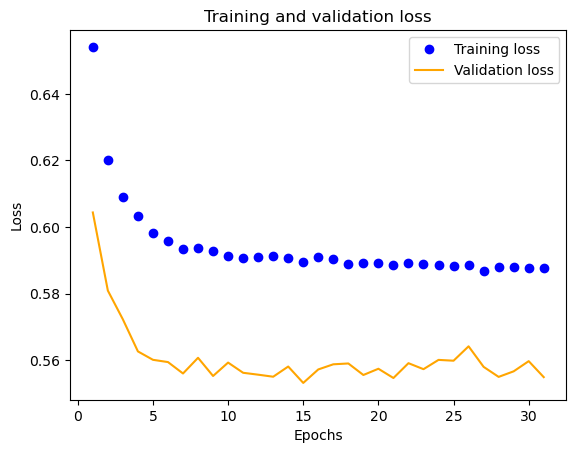

In [13]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/home/jieun201/fullprecision400e_yprofile/loss.png')

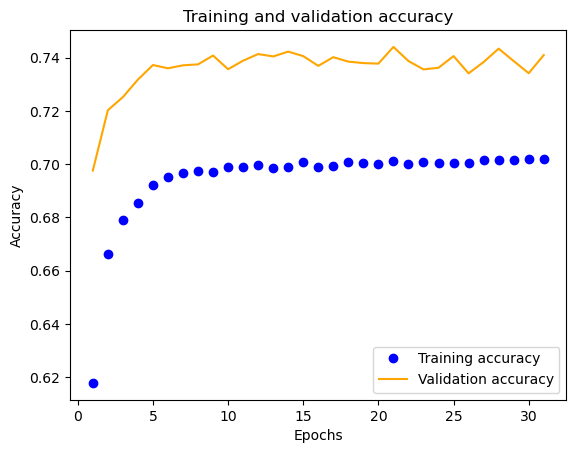

<Figure size 640x480 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
np.max(val_acc)
plt.savefig('/home/jieun201/fullprecision400e_yprofile/accuracy.png')

In [15]:
model.predict(X_test) 
np.round(model.predict(X_test),0) 
preds = np.round(model.predict(X_test),0)
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)
print(classification_report(y_test, preds))

[[42906 10812]
 [16609 37109]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     53718
           1       0.77      0.69      0.73     53718

    accuracy                           0.74    107436
   macro avg       0.75      0.74      0.74    107436
weighted avg       0.75      0.74      0.74    107436



In [16]:
predictionsFiles = np.round(model.predict(X_test),0)

In [17]:
pd.DataFrame(predictionsFiles).to_csv("/home/jieun201/fullprecision400e_yprofile/predictionsFiles.csv",header='predict', index=False)

In [18]:
pd.DataFrame(y_test).to_csv("/home/jieun201/fullprecision400e_yprofile/true.csv",header='true', index=False)